# **1. Perkenalan Dataset**


Sleep Health and Lifestyle Dataset

https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data?select=Sleep_health_and_lifestyle_dataset.csv

# **2. Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [3]:
# Load Data
df = pd.read_csv('../data_raw/Sleep_health_and_lifestyle_dataset.csv')

# **4. Exploratory Data Analysis (EDA)**

In [4]:
# EDA
print("Shape:", df.shape)
df.info()

Shape: (374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Missing value
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# Duplikasi
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah missing value per kolom:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Jumlah data duplikat: 0


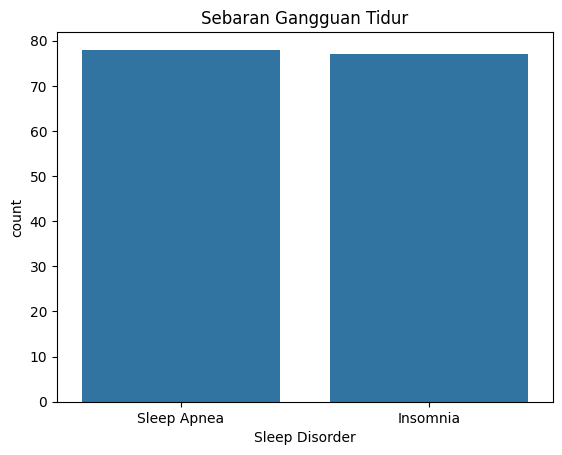

In [6]:
# Visualisasi Target
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Sebaran Gangguan Tidur')
plt.show()

# **5. Data Preprocessing**

In [7]:
# Preprocessing
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print(df['Sleep Disorder'].value_counts())

# Encoding (Mengubah teks jadi angka)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [9]:
df.to_csv('data_clean/Sleep_health_clean.csv', index=False)